# TSP Algorithm Analysis

This notebook analyzes the results of various TSP (Traveling Salesman Problem) algorithms.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
plt.rcParams.update({'font.size': 12, 'axes.labelsize': 14, 'axes.titlesize': 16})
sns.set_theme(style="whitegrid", palette="deep")

## Load and Prepare Data

We are using the results dataset for the matrix2.txt TSP problem. The file we're loading contains the results of various TSP algorithms applied to the matrix2 problem. It includes information about TSPNNGRASP solver, improvers, their parameters, and performance metrics such as total cost and execution time.


In [3]:
# Load the CSV file
df = pd.read_csv('data/tspnngrasp.csv', sep=';')

# Display the first few rows and data info
print(df.head())
print(df.info())

   ProblemFile      Solver                   Improver  MultiRuns  \
0  matrix2.txt  TSPNNGRASP  RoutingSimulatedAnnealing          3   
1  matrix2.txt  TSPNNGRASP  RoutingSimulatedAnnealing          1   
2  matrix2.txt  TSPNNGRASP  RoutingSimulatedAnnealing          5   
3  matrix2.txt  TSPNNGRASP  RoutingSimulatedAnnealing          5   
4  matrix2.txt  TSPNNGRASP  RoutingSimulatedAnnealing          3   

   TwoOptMaxIter  ThreeOptMaxIter  GraspListSize  SAInitialTemp  \
0             -1               -1             15           5000   
1             -1               -1             10          10000   
2             -1               -1              3          10000   
3             -1               -1              3           1000   
4             -1               -1              7           1000   

   SACoolingRate  SAIterations  ...  Beta  Rho  Q  TotalCost  AvgCost  \
0              0             0  ...    -1   -1  0        651       15   
1              0             0  ...    -1 

## Data Analysis

In this section, we'll perform a comprehensive analysis of the TSP algorithm results for the matrix2.txt dataset. We'll start by examining the overall performance of different solver and improver combinations.

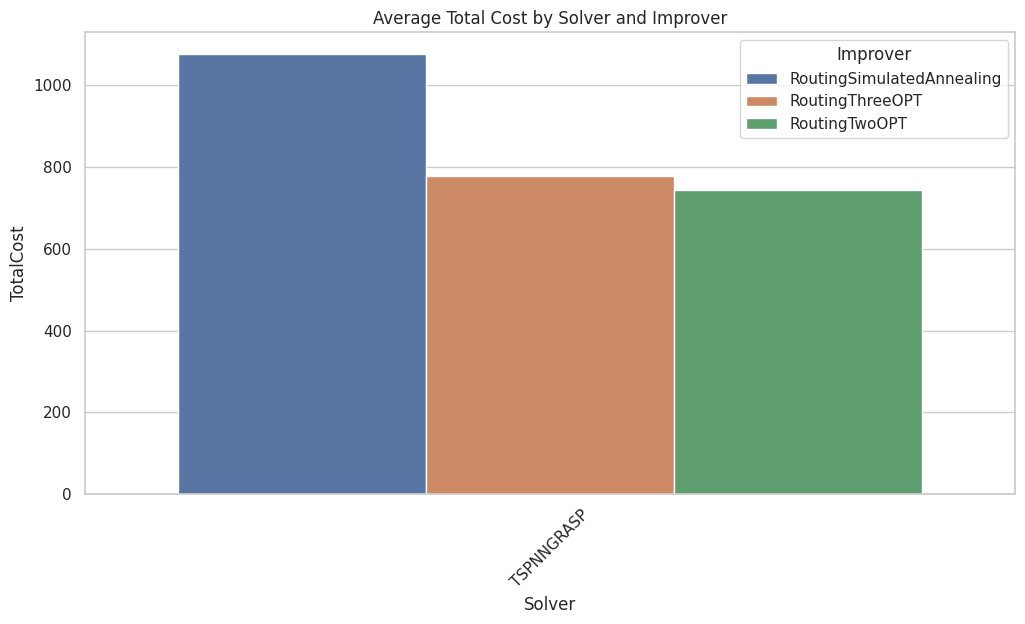

In [4]:
# Group by Solver and Improver, calculate mean TotalCost
grouped = df.groupby(['Solver', 'Improver'])['TotalCost'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Solver', y='TotalCost', hue='Improver', data=grouped)
plt.title('Average Total Cost by Solver and Improver')
plt.xticks(rotation=45)
plt.show()

## Performance Analysis

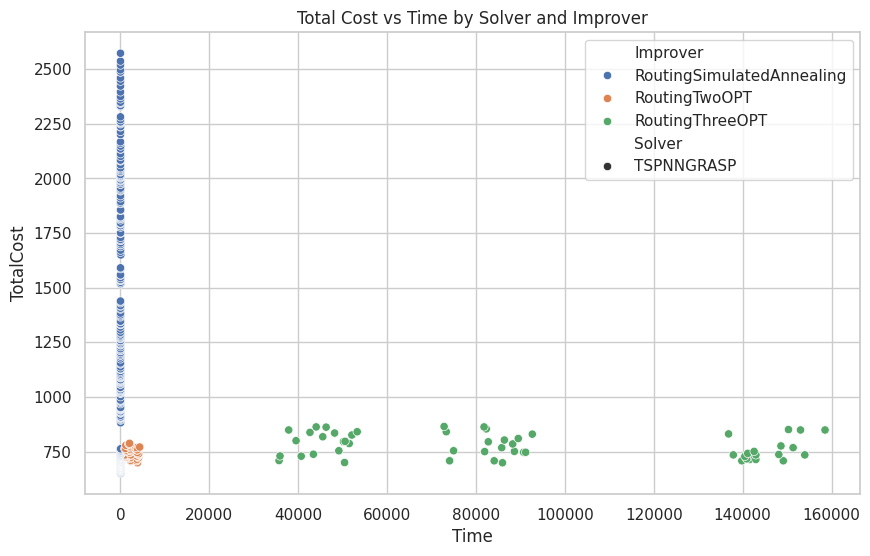

In [5]:
# Scatter plot of TotalCost vs Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='TotalCost', hue='Improver', style='Solver', data=df)
plt.title('Total Cost vs Time by Solver and Improver')
plt.show()

## Parameter Analysis

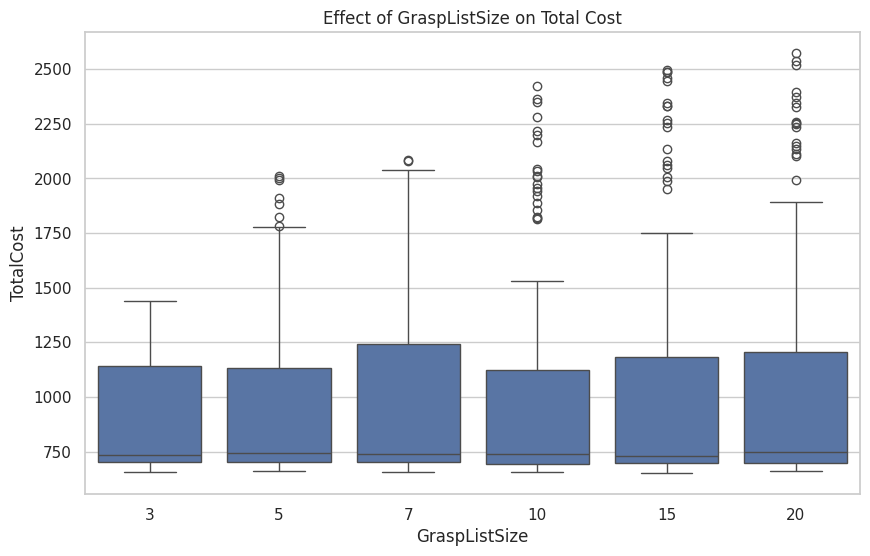

In [6]:
# Analyze effect of GraspListSize on TotalCost
plt.figure(figsize=(10, 6))
sns.boxplot(x='GraspListSize', y='TotalCost', data=df[df['Solver'] == 'TSPNNGRASP'])
plt.title('Effect of GraspListSize on Total Cost')
plt.show()

# Analysis of 2-OPT Improver

Based on our previous analysis, the 2-OPT improver has shown the best average performance for solving the Traveling Salesman Problem (TSP) using the TSPNNGRASP solver with the matrix2.txt dataset. In the following sections, we will dive deeper into the performance characteristics and parameter sensitivity of the 2-OPT improver.


We'll examine how different parameters, such as the maximum number of iterations (TwoOptMaxIter) and the GRASP list size, affect the total cost and execution time. This analysis will help us understand the trade-offs between solution quality and computational effort, as well as identify the optimal parameter settings for the 2-OPT improver in this specific TSP instance.


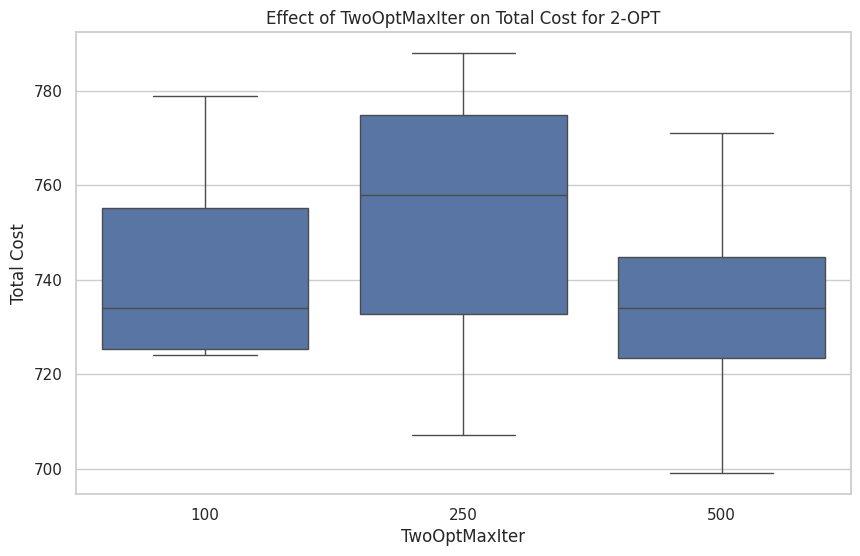

In [7]:
# Filter data for 2-OPT improver
df_2opt = df[df['Improver'] == 'RoutingTwoOPT']

# Analyze effect of TwoOptMaxIter on TotalCost
plt.figure(figsize=(10, 6))
sns.boxplot(x='TwoOptMaxIter', y='TotalCost', data=df_2opt)
plt.title('Effect of TwoOptMaxIter on Total Cost for 2-OPT')
plt.xlabel('TwoOptMaxIter')
plt.ylabel('Total Cost')
plt.show()



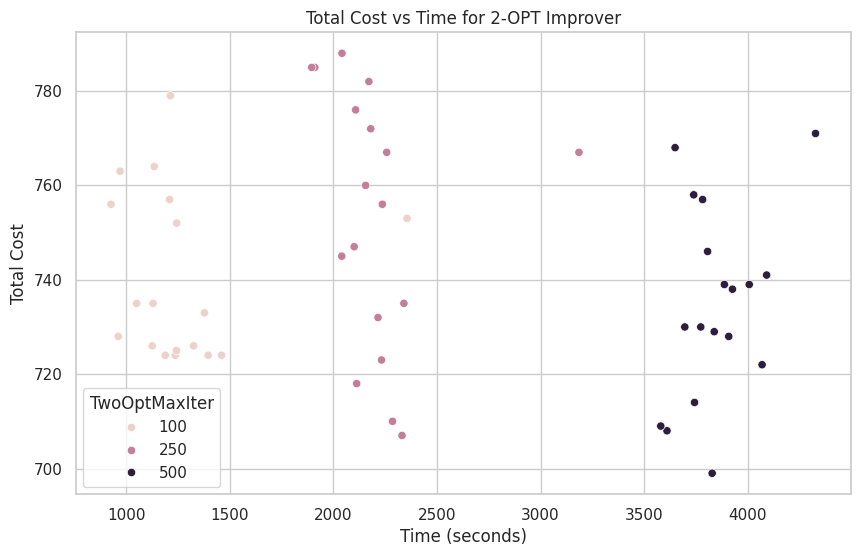

In [8]:
# Scatter plot of TotalCost vs Time for 2-OPT
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='TotalCost', hue='TwoOptMaxIter', data=df_2opt)
plt.title('Total Cost vs Time for 2-OPT Improver')
plt.xlabel('Time (seconds)')
plt.ylabel('Total Cost')
plt.legend(title='TwoOptMaxIter')
plt.show()


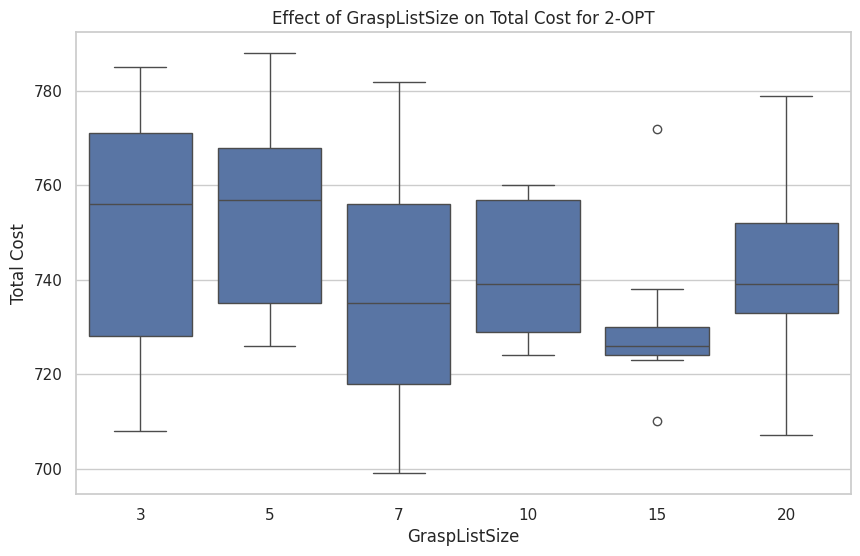

In [9]:

# Analyze effect of GraspListSize on TotalCost for 2-OPT
plt.figure(figsize=(10, 6))
sns.boxplot(x='GraspListSize', y='TotalCost', data=df_2opt)
plt.title('Effect of GraspListSize on Total Cost for 2-OPT')
plt.xlabel('GraspListSize')
plt.ylabel('Total Cost')
plt.show()

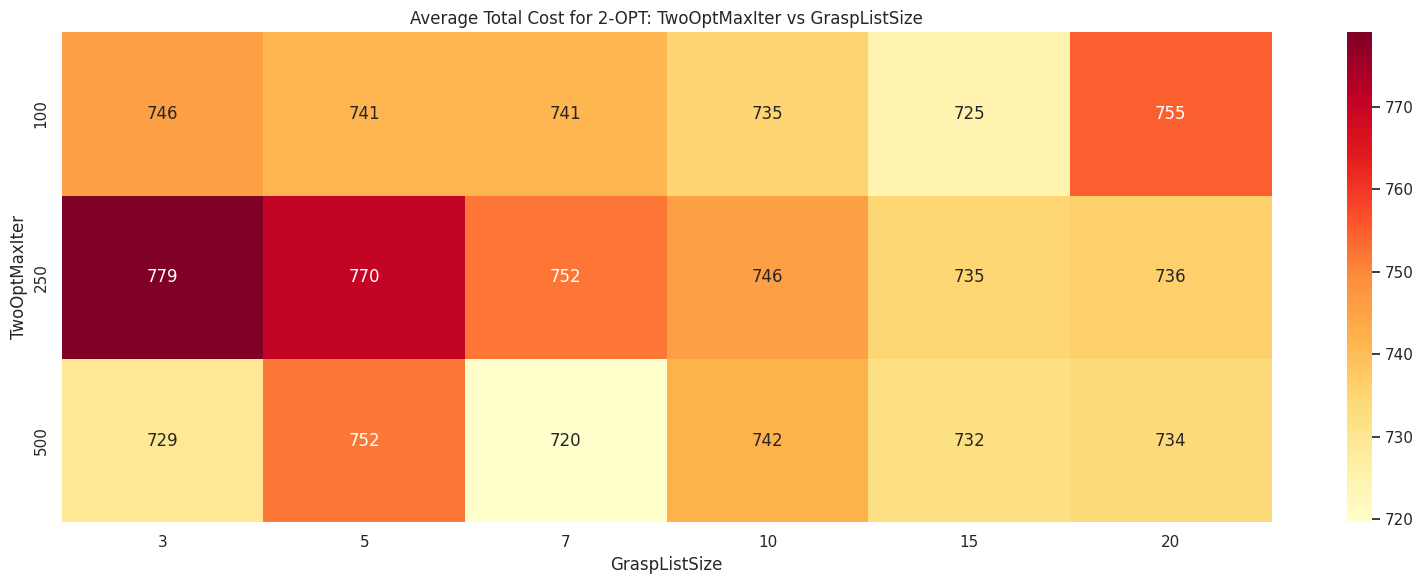

In [10]:
# Heatmap of TotalCost for different combinations of TwoOptMaxIter and GraspListSize
pivot_table = df_2opt.pivot_table(values='TotalCost', index='TwoOptMaxIter', columns='GraspListSize', aggfunc='mean')
plt.figure(figsize=(16, 6))  # Adjusted figure size to make it more rectangular
sns.heatmap(pivot_table, annot=True, cmap='YlOrRd', fmt='.0f')  # Removed aspect='auto'
plt.title('Average Total Cost for 2-OPT: TwoOptMaxIter vs GraspListSize')
plt.xlabel('GraspListSize')
plt.ylabel('TwoOptMaxIter')
plt.tight_layout()  # Added to ensure all elements fit within the figure
plt.show()


In [16]:
# Filter SimulatedAnnealing results to keep only those with TotalCost at least as bad as the worst 2-OPT result
worst_2opt_cost = df_2opt['TotalCost'].max()
df_sa = df[df['Improver'] == 'RoutingSimulatedAnnealing']
df_sa_filtered = df_sa[df_sa['TotalCost'] >= worst_2opt_cost]

# Combine filtered SimulatedAnnealing results with 2-OPT results
df_combined = pd.concat([df_2opt, df_sa_filtered])

# Print summary statistics
print("Number of 2-OPT solutions:", len(df_2opt))
print("Number of filtered SimulatedAnnealing solutions:", len(df_sa_filtered))
print("\nWorst 2-OPT Total Cost:", worst_2opt_cost)
print("Worst SimulatedAnnealing Total Cost:", df_sa_filtered['TotalCost'].max())
print("\nAverage Time for 2-OPT:", df_2opt['Time'].mean())
print("Average Time for filtered SimulatedAnnealing:", df_sa_filtered['Time'].mean())

# Print best solutions for each improver
print("\nBest 2-OPT solution:")
best_2opt = df_2opt.loc[df_2opt['TotalCost'].idxmin()]
print(f"Total Cost: {best_2opt['TotalCost']}, Time: {best_2opt['Time']}, TwoOptMaxIter: {best_2opt['TwoOptMaxIter']}, GraspListSize: {best_2opt['GraspListSize']}")

print("\nBest SimulatedAnnealing solution:")
best_sa = df_sa.loc[df_sa['TotalCost'].idxmin()]
print(f"Total Cost: {best_sa['TotalCost']}, Time: {best_sa['Time']}, SAInitialTemp: {best_sa['SAInitialTemp']}, SACoolingRate: {best_sa['SACoolingRate']}, SAIterations: {best_sa['SAIterations']}")


Number of 2-OPT solutions: 54
Number of filtered SimulatedAnnealing solutions: 216

Worst 2-OPT Total Cost: 788
Worst SimulatedAnnealing Total Cost: 2573

Average Time for 2-OPT: 2436.8518518518517
Average Time for filtered SimulatedAnnealing: 15.708333333333334

Best 2-OPT solution:
Total Cost: 699, Time: 3828, TwoOptMaxIter: 500, GraspListSize: 7

Best SimulatedAnnealing solution:
Total Cost: 651, Time: 70, SAInitialTemp: 5000, SACoolingRate: 0, SAIterations: 0


In [ ]:
# Box plot comparing TotalCost distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='Improver', y='TotalCost', data=df_combined)
plt.title('TotalCost Distribution: 2-OPT vs Filtered SimulatedAnnealing')
plt.ylabel('Total Cost')
plt.show()


In [ ]:

# Scatter plot of TotalCost vs Time
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Time', y='TotalCost', hue='Improver', data=df_combined)
plt.title('Total Cost vs Time: 2-OPT vs Filtered SimulatedAnnealing')
plt.xlabel('Time (seconds)')
plt.ylabel('Total Cost')
plt.legend(title='Improver')
plt.show()



In [ ]:
# Analyze effect of SAInitialTemp on TotalCost for filtered SimulatedAnnealing
plt.figure(figsize=(12, 6))
sns.boxplot(x='SAInitialTemp', y='TotalCost', data=df_sa_filtered)
plt.title('Effect of SAInitialTemp on Total Cost for Filtered SimulatedAnnealing')
plt.xlabel('SAInitialTemp')
plt.ylabel('Total Cost')
plt.show()


In [ ]:

# Analyze effect of SACoolingRate on TotalCost for filtered SimulatedAnnealing
plt.figure(figsize=(12, 6))
sns.boxplot(x='SACoolingRate', y='TotalCost', data=df_sa_filtered)
plt.title('Effect of SACoolingRate on Total Cost for Filtered SimulatedAnnealing')
plt.xlabel('SACoolingRate')
plt.ylabel('Total Cost')
plt.show()



In [ ]:
# Heatmap of TotalCost for different combinations of SAInitialTemp and SACoolingRate
pivot_table_sa = df_sa_filtered.pivot_table(values='TotalCost', index='SAInitialTemp', columns='SACoolingRate', aggfunc='mean')
plt.figure(figsize=(16, 6))
sns.heatmap(pivot_table_sa, annot=True, cmap='YlOrRd', fmt='.0f')
plt.title('Average Total Cost for Filtered SimulatedAnnealing: SAInitialTemp vs SACoolingRate')
plt.xlabel('SACoolingRate')
plt.ylabel('SAInitialTemp')
plt.tight_layout()
plt.show()